<a href="https://colab.research.google.com/github/Witcape/PSO/blob/main/Initialisation_%26_weight_%26_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installing LLM

In [1]:
# !pip install accelerate
# import accelerate

In [2]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.8 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
    Using cached setuptools-70.3.0-py3-none-any.whl (931 kB)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 2.2 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 20.6 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 9.5 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 2.9 MB/s eta 0:00:00
    Using cached wheel-0.43.0-py3-none-any.whl (65 kB)
    Creating /tmp/pip-build-env-mob895j1/overlay/local/bin
    changing mode of /tmp/pip-build-env-mob895j1/overlay/local/bin/ninja to 755
    changing mode of /tmp/pip-build-env-mob895j1/overlay/local/bin/wheel to 755
    changing mode of /tmp/pip-

In [3]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [4]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt

In [5]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [6]:
# GPU
lcpp_llm = None
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [7]:
lcpp_llm.params.n_gpu_layers

32

### Initialisation using LLM

In [8]:
method =' Quasi-Random Sequence'
prompt = f"generate 20 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [9]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

In [10]:
print(response)

{'id': 'cmpl-42ad907e-5abd-48d3-9524-003c34adf4e9', 'object': 'text_completion', 'created': 1720720184, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': 'SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\nUSER: generate 20 numbers between -10 to 10 by using  Quasi-Random Sequence, only 2 decimal places, \n\nASSISTANT:\n\nHere is a list of 20 quasi-random numbers between -10 and 10 with two decimal places:\n\n1. -8.47\n2. -5.93\n3. -3.69\n4. -2.25\n5. -1.08\n6. 0.87\n7. 1.78\n8. 2.69\n9. 3.59\n10. 4.47\n11. 5.38\n12. 6.27\n13. 7.15\n14. 8.02\n15. 8.90\n16. 9.77\n17. 10.64\n18. 11.50\n19. 12.35\n20. 13.20\n\nPlease note that these numbers are generated using a Quasi-Random Sequence, which means they may not be perfectly uniform or random, but should still provide a good representation of the range -10 to 10 with 

In [11]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-8.47, -5.93, -3.69, -2.25, -1.08, 0.87, 1.78, 2.69, 3.59, 4.47, 5.38, 6.27, 7.15, 8.02, 8.9, 9.77, 10.64, 11.5, 12.35, 13.2]


## Normalised Glorot Initialization + Roulette Wheel Selection

###PSO Parameters

In [12]:
!pip install pyswarms
import numpy as np
import pyswarms as ps
# from pso.cost_functions import sphere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.6 MB/s eta 0:00:00


In [13]:
# initial_position = np.array(numbers)

# def objective_function(x):
#     return np.sum(x**2)

# bounds = (np.array([-10]), np.array([10]))

# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# optimizer = ps.single.GlobalBestPSO(n_particles=len(numbers), dimensions=1, options=options, bounds=bounds, init_pos=initial_position.reshape(-1, 1))

# best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# print('Best position:', best_pos)
# print('Best objective:', best_cost)


In [14]:
def sphere(x):
    return sum(x**2)

In [15]:
CostFunction = sphere  #
nVar = 10  # Number of Decision Variables
VarSize = (nVar,)  # Size of Decision Variables Matrix
VarMin = -10  # Lower Bound of Variables
VarMax = 10  # Upper Bound of Variables

In [16]:
MaxIt = 20  # Maximum Number of Iterations
nPop = np.size(numbers)  # Population Size (Swarm Size)
print(nPop)

20


In [17]:
w = 1  # Inertia Weight
wdamp = 0.99  # Inertia Weight Damping Ratio
c1 = 1.5  # Personal Learning Coefficient
c2 = 2.0  # Global Learning Coefficient

In [18]:
# Velocity Limits                        HOWW. ASK BHAIYA ABOUT THIS
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

In [19]:
particles = []

for i in range(nPop):
    position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
    velocity = np.zeros(VarSize)
    cost = CostFunction(position)
    best_position = position.copy()
    best_cost = cost
    particles.append({
        'Position': position,
        'Velocity': velocity,
        'Cost': cost,
        'Best': {
            'Position': best_position,
            'Cost': best_cost
        }
    })
print(np.size(particles))

20


In [20]:
GlobalBest = {'Position': None, 'Cost': np.inf}

for p in particles:
    if p['Cost'] < GlobalBest['Cost']:
        GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

BestCost = np.zeros(MaxIt)

### Weight W using LLM

In [21]:
w_values = []
g_values = []

for it in range(MaxIt):
    for p in particles:
        # Update Velocity
        r1 = np.random.rand(*VarSize)
        r2 = np.random.rand(*VarSize)
        p['Velocity'] = (
            w * p['Velocity']
            + c1 * r1 * (p['Best']['Position'] - p['Position'])
            + c2 * r2 * (GlobalBest['Position'] - p['Position'])
        )

        # Apply Velocity Limits
        p['Velocity'] = np.maximum(p['Velocity'], VelMin)
        p['Velocity'] = np.minimum(p['Velocity'], VelMax)

        # Update Position
        p['Position'] += p['Velocity']

        # Velocity Mirror Effect
        IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
        p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

        # Apply Position Limits
        p['Position'] = np.maximum(p['Position'], VarMin)
        p['Position'] = np.minimum(p['Position'], VarMax)

        # Evaluation
        p['Cost'] = CostFunction(p['Position'])

        # Update Personal Best
        if p['Cost'] < p['Best']['Cost']:
            p['Best']['Position'] = p['Position'].copy()
            p['Best']['Cost'] = p['Cost']

        print(p['Best']['Cost'])


    costs = [p['Best']['Cost'] for p in particles]
    costs.append(GlobalBest['Cost'])
    min_cost = min(costs)
    min_p_best = min([p['Best']['Cost'] for p in particles])

    prompt = f"I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost ({GlobalBest['Cost']}) and various personal best costs from the particles ({min_p_best}). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally."
    g_best_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

    USER: {prompt}

    ASSISTANT:
    '''

    g_best_response = lcpp_llm(prompt=g_best_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
                              repeat_penalty=1.2, top_k=150,
                              echo=True)
    print(g_best_response)
    g_best_response = g_best_response['choices'][0]['text']
    g_best_value = re.findall(r'-?\d+\.\d+', g_best_response)
    g_best_value = [float(num) for num in g_best_value]
    g_best_value = g_best_value[-1] # take the last value
    print(g_best_value)
    g_values.append(g_best_value)

    if g_best_value < GlobalBest['Cost']:
        for p in particles:
            if p['Best']['Cost'] == g_best_value:
                GlobalBest['Position'] = p['Best']['Position'].copy()
                GlobalBest['Cost'] = g_best_value
                break

    BestCost[it] = GlobalBest['Cost']

    print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")

    prompt = f"Generate a positive number a little lower than {w} and greater then 0.1 using Normalised Glorot Initialization. Don't write anything else, just write that number in decimal notation normally."
    w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

    USER: {prompt}

    ASSISTANT:
    '''

    w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
                          repeat_penalty=1.2, top_k=150,
                          echo=True)

    g_values.append(GlobalBest['Cost'])
    BestCost[it] = GlobalBest['Cost']

    text_response = w_response['choices'][0]['text']
    value = re.findall(r'-?\d+\.\d+', text_response)
    value = [float(num) for num in value]

    value = value[np.size(value) - 1]
    print(f'w{it+1} = {value}')
    w_values.append(w)
    w = value

w_values.append(w)
print(g_values)
print(w_values)

464.3195046257885
195.0761829817481
36.727443256275095
4.916772004478036
6.097179312717929
7.569
18.78750224391873
28.813247931201104
37.90883605060983
75.30752740714465
120.42372799806935
197.036336533367
265.225
377.6980094416481
482.06137891012736
609.6562957440691
758.6793640127634
910.8396598449469
1000.0
1000.0


Llama.generate: prefix-match hit


{'id': 'cmpl-364d0007-dafe-48a1-8fbd-b6b2cf644e59', 'object': 'text_completion', 'created': 1720720315, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (7.569) and various personal best costs from the particles (4.916772004478036). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     The new minimum global best cost is 4.916772004478036.", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 

Llama.generate: prefix-match hit


w1 = 0.84729356445
232.92953226709318
60.54950496548552
1.5770952689180477
4.916772004478036
6.097179312717929
6.6026722500117145
6.650722867064954
11.17277208391743
2.2520104647792447
7.569532626603389
24.54968240923823
62.641238482282276
99.22500000000001
174.75621282545558
244.38439029172537
337.3523792992684
450.3656812834676
569.1227294811946
743.9236183261742
658.0614724540495


Llama.generate: prefix-match hit


{'id': 'cmpl-fbac641a-2923-4a9d-88ad-c5001183efc8', 'object': 'text_completion', 'created': 1720720369, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (4.916772004478036) and various personal best costs from the particles (1.5770952689180477). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     The new minimum global best cost is 1.5770952689180477.", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'pr

Llama.generate: prefix-match hit


w2 = 0.77692156387
81.5395599083977
6.029573318175828
1.5770952689180477
4.916772004478036
5.114216164706113
6.6026722500117145
6.650722867064954
11.17277208391743
2.2520104647792447
7.569532626603389
3.461585793834577
5.018719448186597
13.22500000000001
47.8178104520811
86.70740167332342
147.31211086417318
222.0519985541716
307.40579911744226
440.7473768880425
373.8263574512681


Llama.generate: prefix-match hit


{'id': 'cmpl-013733ae-90cc-4ce6-902d-79f310e3047d', 'object': 'text_completion', 'created': 1720720410, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (1.5770952689180477) and various personal best costs from the particles (1.5770952689180477). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    1.5770952689180477", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 165, 'completion_tokens

Llama.generate: prefix-match hit


w3 = 0.64782852521
10.371533465277915
6.029573318175828
1.5770952689180477
4.916772004478036
5.114216164706113
5.165804928384782
2.1141634092959385
3.7510505989040914
2.2520104647792447
5.69589544820116
3.461585793834577
5.018719448186597
6.896617846052029
1.0848159266060926
9.941852799102861
35.784772247076575
73.7383158248756
129.8549672992142
217.5711354499108
174.77593182425625


Llama.generate: prefix-match hit


{'id': 'cmpl-27c18365-1e1e-45e8-b70a-2d8d46aeafef', 'object': 'text_completion', 'created': 1720720449, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (1.5770952689180477) and various personal best costs from the particles (1.0848159266060926). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    1.5770952689180477", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 165, 'completion_tokens

Llama.generate: prefix-match hit


w4 = 0.59377719745
10.23652766627816
6.029573318175828
1.5770952689180477
4.037943385831241
2.7386650795196106
2.959619448513945
2.1141634092959385
3.7510505989040914
2.2520104647792447
5.69589544820116
2.754191458936399
5.018719448186597
6.896617846052029
1.0848159266060926
7.579979008903867
0.768561683626863
7.711517160594757
27.346481741248073
77.6125548466031
53.05988509000978


Llama.generate: prefix-match hit


{'id': 'cmpl-8f98eae4-e6f3-48b9-bbba-d280e84bc275', 'object': 'text_completion', 'created': 1720720522, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (1.5770952689180477) and various personal best costs from the particles (0.768561683626863). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    1.5770952689180477", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 164, 'completion_tokens'

Llama.generate: prefix-match hit


w5 = 0.482674587897
10.23652766627816
6.029573318175828
1.5770952689180477
4.037943385831241
2.7386650795196106
1.481844547613812
2.1141634092959385
3.7510505989040914
2.2520104647792447
1.511674408634721
2.754191458936399
5.018719448186597
6.896617846052029
1.0848159266060926
7.579979008903867
0.768561683626863
7.34851346124462
1.7721990601317748
12.46693462420458
5.495444395800192


Llama.generate: prefix-match hit


{'id': 'cmpl-64717937-dcb2-4fbf-83c4-d118540f2515', 'object': 'text_completion', 'created': 1720720558, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (1.5770952689180477) and various personal best costs from the particles (0.768561683626863). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     The new minimum global best cost is 0.768561683626863.", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'pro

Llama.generate: prefix-match hit


w6 = 0.395240974575
2.9032567229107427
6.029573318175828
1.5770952689180477
3.9834253021852177
2.7386650795196106
1.210508723410323
2.1141634092959385
3.7510505989040914
2.2520104647792447
1.511674408634721
2.754191458936399
3.135336217500742
5.581181264691845
1.0848159266060926
3.890651745425164
0.768561683626863
4.113587693319626
1.7721990601317748
5.017793506737325
5.495444395800192


Llama.generate: prefix-match hit


{'id': 'cmpl-28a5822d-86eb-4d4f-b37d-21b2f1463d7f', 'object': 'text_completion', 'created': 1720720581, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.768561683626863) and various personal best costs from the particles (0.768561683626863). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.768561683626863", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 163, 'completion_tokens': 

Llama.generate: prefix-match hit


w7 = 0.386869484724
2.9032567229107427
2.6681466456884495
1.501611304466739
2.1151398108966486
2.1918644455357668
1.210508723410323
0.4032527424338134
2.042851506881326
1.9596072471217085
1.3924484444496765
2.754191458936399
3.135336217500742
5.581181264691845
1.0848159266060926
3.890651745425164
0.768561683626863
3.41324021272952
1.7721990601317748
5.017793506737325
5.495444395800192


Llama.generate: prefix-match hit


{'id': 'cmpl-6a982d22-9318-42ab-b824-7ac0284f90bd', 'object': 'text_completion', 'created': 1720720601, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.768561683626863) and various personal best costs from the particles (0.4032527424338134). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     The new minimum global best cost is 0.4032527424338134.", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'pr

Llama.generate: prefix-match hit


w8 = 0.352767880865
2.0098094778967424
2.6681466456884495
1.501611304466739
1.3458137900486578
2.1918644455357668
1.210508723410323
0.4032527424338134
1.3972020913206473
1.9596072471217085
1.3924484444496765
2.754191458936399
3.135336217500742
2.966882615535085
1.0848159266060926
2.4889944761077114
0.768561683626863
3.41324021272952
1.7721990601317748
4.453111061436633
5.495444395800192


Llama.generate: prefix-match hit


{'id': 'cmpl-d3e7c822-fee3-430b-8567-1a01eee07640', 'object': 'text_completion', 'created': 1720720622, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.4032527424338134) and various personal best costs from the particles (0.4032527424338134). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.4032527424338134", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 165, 'completion_tokens

Llama.generate: prefix-match hit


w9 = 0.294573209448
1.973091371231015
2.373451016596276
1.501611304466739
1.262348786189071
1.1460315670818169
1.210508723410323
0.4032527424338134
1.3972020913206473
1.1379074451665772
0.516810909263875
1.4582552959851913
2.007706271589689
1.4717153736337696
0.981716647405121
2.4889944761077114
0.768561683626863
1.4712158498236267
1.7721990601317748
4.453111061436633
5.495444395800192


Llama.generate: prefix-match hit


{'id': 'cmpl-14b43df2-3f23-41ec-9ef7-4b3b3c360c37', 'object': 'text_completion', 'created': 1720720642, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.4032527424338134) and various personal best costs from the particles (0.4032527424338134). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.4032527424338134", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 165, 'completion_tokens

Llama.generate: prefix-match hit


w10 = 0.267872974479
1.0380623723308335
1.5841292958923967
1.0535076528006657
0.578767249602267
0.9650958731631962
1.210508723410323
0.4032527424338134
0.4120285937070757
1.1379074451665772
0.36097793380645005
0.48419704016869813
1.0340648090452125
1.4717153736337696
0.9198573788271649
0.481713144609649
0.768561683626863
0.9098398935053646
1.1764633018019437
1.8540651673956239
2.537810538434641


Llama.generate: prefix-match hit


{'id': 'cmpl-55aeca0c-8674-4a40-9984-584edc9de134', 'object': 'text_completion', 'created': 1720720660, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.4032527424338134) and various personal best costs from the particles (0.36097793380645005). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.36097793380645005", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 166, 'completion_toke

Llama.generate: prefix-match hit


w11 = 0.253125
0.8815497289338895
1.0357982140760704
0.9884478236489757
0.4316857491143283
0.9619145190996146
1.210508723410323
0.4032527424338134
0.4120285937070757
1.1379074451665772
0.36097793380645005
0.3911049013851577
0.6238223589989399
1.4717153736337696
0.7090107922231599
0.481713144609649
0.768561683626863
0.7102716338652418
1.1409842935953634
1.7041274663646553
2.537810538434641


Llama.generate: prefix-match hit


{'id': 'cmpl-50ebce10-f743-434a-95b3-b6ed4ce5e481', 'object': 'text_completion', 'created': 1720720678, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.36097793380645005) and various personal best costs from the particles (0.36097793380645005). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.36097793380645005", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 167, 'completion_tok

Llama.generate: prefix-match hit


w12 = 0.23456789
0.22163620711508406
0.8911423925144663
0.39514576820107516
0.4316857491143283
0.39329947882297206
1.187252485681044
0.4032527424338134
0.4120285937070757
0.683766565263219
0.36097793380645005
0.3911049013851577
0.29256524434516373
0.35978614769391326
0.46102248965704623
0.481713144609649
0.6037162239457831
0.5888656553251569
1.1000552679273374
1.1093309975033976
2.537810538434641


Llama.generate: prefix-match hit


{'id': 'cmpl-c738ff90-598f-4bbf-a740-94b69460acbd', 'object': 'text_completion', 'created': 1720720704, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.36097793380645005) and various personal best costs from the particles (0.22163620711508406). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.22163620711508406", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 167, 'completion_tok

Llama.generate: prefix-match hit


w13 = 0.22913255
0.18394426978079012
0.6053796250279759
0.39514576820107516
0.425546145888758
0.31554541879298503
0.4619604406115394
0.23188542282392427
0.4120285937070757
0.2487296273022831
0.256957981674553
0.3911049013851577
0.29256524434516373
0.35978614769391326
0.28721545426403444
0.481713144609649
0.5377427702635854
0.3791319018380918
0.5860703885123563
0.3972874892256709
1.0426743647754049


Llama.generate: prefix-match hit


{'id': 'cmpl-cc8c3694-c869-4afd-9e89-0208fcea3f1a', 'object': 'text_completion', 'created': 1720720738, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.22163620711508406) and various personal best costs from the particles (0.18394426978079012). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.18394426978079012", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 167, 'completion_tok

Llama.generate: prefix-match hit


w14 = 0.18764329
0.18158751532606837
0.24432979306462735
0.39514576820107516
0.19023507560664335
0.2104319880223436
0.44533374898056194
0.18597801131991132
0.4120285937070757
0.2487296273022831
0.21599448447370512
0.3911049013851577
0.29256524434516373
0.1616667416162479
0.19989090234553697
0.481713144609649
0.5132449497572318
0.24608315088745747
0.24490886147925622
0.246407059481845
0.8181859253505855


Llama.generate: prefix-match hit


{'id': 'cmpl-07546d44-eef7-4570-b59b-e1b03ee6aa8f', 'object': 'text_completion', 'created': 1720720762, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.18394426978079012) and various personal best costs from the particles (0.1616667416162479). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.1616667416162479", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 166, 'completion_token

Llama.generate: prefix-match hit


w15 = 0.175
0.16052752513816668
0.2141843676130194
0.33257035102556154
0.16882665952966572
0.18768040810664258
0.08956773576409052
0.16823793059566952
0.4120285937070757
0.2487296273022831
0.16090617967296067
0.3911049013851577
0.20671399423559889
0.1616667416162479
0.17685188254372436
0.481713144609649
0.2092010310435321
0.1716341382030073
0.17250562593277208
0.1810695115140307
0.6403395368600808


Llama.generate: prefix-match hit


{'id': 'cmpl-1bb13eb5-0c17-420b-8bc5-703a478d2e00', 'object': 'text_completion', 'created': 1720720776, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.1616667416162479) and various personal best costs from the particles (0.08956773576409052). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.08956773576409052", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 166, 'completion_toke

Llama.generate: prefix-match hit


w16 = 0.162
0.10058786830214589
0.18834724041128464
0.296381932010265
0.16882665952966572
0.11848679656821708
0.07760681423103151
0.04105754387575525
0.3950392429830984
0.2487296273022831
0.16090617967296067
0.09324938263734646
0.12365377281931474
0.07997318343409138
0.11449439307124082
0.481713144609649
0.12038739859421486
0.14865291884246964
0.09718785993768278
0.1810695115140307
0.4287987988462078


Llama.generate: prefix-match hit


{'id': 'cmpl-e322a439-2755-4dcb-bfdc-13ac3cfcd5e7', 'object': 'text_completion', 'created': 1720720809, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.08956773576409052) and various personal best costs from the particles (0.04105754387575525). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.04105754387575525", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 167, 'completion_tok

Llama.generate: prefix-match hit


w17 = 0.145
0.05200607822960403
0.06864108510356383
0.06897397302191978
0.16882665952966572
0.09929113551284832
0.0418097822017559
0.04105754387575525
0.16579761885924107
0.2487296273022831
0.1591659079232486
0.03086116190053592
0.12195866052935052
0.04962940986179657
0.048113457837759874
0.15695252760713416
0.0546420086487146
0.11601370027451714
0.03437703253104902
0.06845286222563089
0.04354859709135314


Llama.generate: prefix-match hit


{'id': 'cmpl-b5c77b1d-e31d-4799-ace7-ab8f8066957a', 'object': 'text_completion', 'created': 1720720824, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.04105754387575525) and various personal best costs from the particles (0.03086116190053592). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     The new minimum global best cost is 0.03086116190053592.", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': 

Llama.generate: prefix-match hit


w18 = 0.137
0.03644653199413592
0.05660004877257809
0.06897397302191978
0.06715604489865354
0.04491915014165994
0.0418097822017559
0.04105754387575525
0.09798488382065561
0.2487296273022831
0.11005045739031297
0.03086116190053592
0.05557474494042121
0.03267537022792057
0.048113457837759874
0.15695252760713416
0.04610221501134283
0.05399805119311637
0.03437703253104902
0.03465674029401574
0.04354859709135314


Llama.generate: prefix-match hit


{'id': 'cmpl-9eff89ec-0814-4253-b7d7-8af044705944', 'object': 'text_completion', 'created': 1720720861, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.03086116190053592) and various personal best costs from the particles (0.03086116190053592). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.03086116190053592", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 167, 'completion_tok

Llama.generate: prefix-match hit


w19 = 0.124
0.03644653199413592
0.047705554083160885
0.047385045837921635
0.02625335038709811
0.036711288872313855
0.019832055135802152
0.04105754387575525
0.058220441451821106
0.2447635847251528
0.07968972886896407
0.027567791833857224
0.03718537261119574
0.03267537022792057
0.048113457837759874
0.12993284193586188
0.029347493934548406
0.031715628290053005
0.03437703253104902
0.021581477896830115
0.03469324967735477


Llama.generate: prefix-match hit


{'id': 'cmpl-f97ab488-2d9a-44b9-88ef-2fada61e0edf', 'object': 'text_completion', 'created': 1720720895, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.03086116190053592) and various personal best costs from the particles (0.019832055135802152). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.019832055135802152", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 168, 'completion_t

Llama.generate: prefix-match hit


w20 = 0.117
[4.916772004478036, 4.916772004478036, 1.5770952689180477, 1.5770952689180477, 1.5770952689180477, 1.5770952689180477, 1.5770952689180477, 1.5770952689180477, 1.5770952689180477, 1.5770952689180477, 0.768561683626863, 0.768561683626863, 0.768561683626863, 0.768561683626863, 0.4032527424338134, 0.4032527424338134, 0.4032527424338134, 0.4032527424338134, 0.4032527424338134, 0.4032527424338134, 0.36097793380645005, 0.36097793380645005, 0.36097793380645005, 0.36097793380645005, 0.22163620711508406, 0.22163620711508406, 0.18394426978079012, 0.18394426978079012, 0.1616667416162479, 0.1616667416162479, 0.08956773576409052, 0.08956773576409052, 0.04105754387575525, 0.04105754387575525, 0.03086116190053592, 0.03086116190053592, 0.03086116190053592, 0.03086116190053592, 0.019832055135802152, 0.019832055135802152]
[1, 0.84729356445, 0.77692156387, 0.64782852521, 0.59377719745, 0.482674587897, 0.395240974575, 0.386869484724, 0.352767880865, 0.294573209448, 0.267872974479, 0.253125, 0.2

In [22]:
print(w_values)

[1, 0.84729356445, 0.77692156387, 0.64782852521, 0.59377719745, 0.482674587897, 0.395240974575, 0.386869484724, 0.352767880865, 0.294573209448, 0.267872974479, 0.253125, 0.23456789, 0.22913255, 0.18764329, 0.175, 0.162, 0.145, 0.137, 0.124, 0.117]


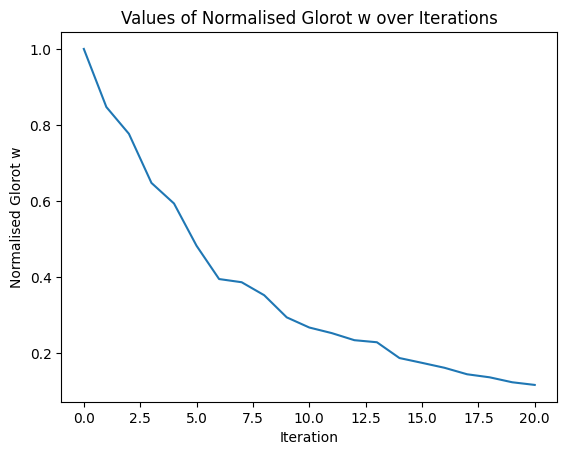

In [24]:
Roulette_Glorot_weights = w_values
plt.plot(Roulette_Glorot_weights)
plt.xlabel("Iteration")
plt.ylabel("Normalised Glorot w")
plt.title("Values of Normalised Glorot w over Iterations")
plt.show()

[4.916772004478036, 4.916772004478036, 1.5770952689180477, 1.5770952689180477, 1.5770952689180477, 1.5770952689180477, 1.5770952689180477, 1.5770952689180477, 1.5770952689180477, 1.5770952689180477, 0.768561683626863, 0.768561683626863, 0.768561683626863, 0.768561683626863, 0.4032527424338134, 0.4032527424338134, 0.4032527424338134, 0.4032527424338134, 0.4032527424338134, 0.4032527424338134, 0.36097793380645005, 0.36097793380645005, 0.36097793380645005, 0.36097793380645005, 0.22163620711508406, 0.22163620711508406, 0.18394426978079012, 0.18394426978079012, 0.1616667416162479, 0.1616667416162479, 0.08956773576409052, 0.08956773576409052, 0.04105754387575525, 0.04105754387575525, 0.03086116190053592, 0.03086116190053592, 0.03086116190053592, 0.03086116190053592, 0.019832055135802152, 0.019832055135802152]


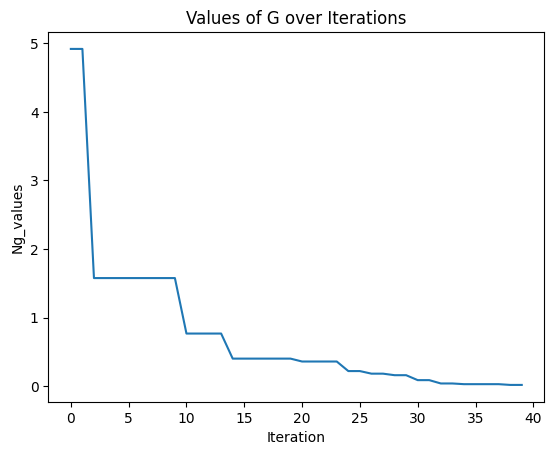

In [25]:
Roulette_Glorot_g_values = g_values

print(g_values)

plt.plot(Roulette_Glorot_g_values)
plt.xlabel("Iteration")
plt.ylabel("Ng_values")
plt.title("Values of G over Iterations")
plt.show()